Use-case: You need to create am model that can predict the species of the IRIS Flower based on the flower's characteristics

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
features = data.iloc[:,[0,1,2,3]].values
label = data.iloc[:,4].values

In [9]:
CL = 0.8
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

for rs in range(1,151):
  X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=rs)

  model = LogisticRegression()
  model.fit(X_train,y_train)

  testScore = model.score(X_test,y_test)
  trainScore = model.score(X_train,y_train)

  if testScore > trainScore and testScore >= CL:
    print("Test Score is {} and Train Score is {} in RS value {}".format(testScore,trainScore,rs))

Test Score is 1.0 and Train Score is 0.9666666666666667 in RS value 3
Test Score is 1.0 and Train Score is 0.9833333333333333 in RS value 9
Test Score is 1.0 and Train Score is 0.975 in RS value 10
Test Score is 1.0 and Train Score is 0.975 in RS value 15
Test Score is 1.0 and Train Score is 0.9666666666666667 in RS value 18
Test Score is 1.0 and Train Score is 0.9666666666666667 in RS value 19
Test Score is 1.0 and Train Score is 0.9666666666666667 in RS value 23
Test Score is 1.0 and Train Score is 0.9666666666666667 in RS value 24
Test Score is 0.9666666666666667 and Train Score is 0.9583333333333334 in RS value 26
Test Score is 1.0 and Train Score is 0.9583333333333334 in RS value 32
Test Score is 1.0 and Train Score is 0.9666666666666667 in RS value 34
Test Score is 1.0 and Train Score is 0.9666666666666667 in RS value 35
Test Score is 1.0 and Train Score is 0.975 in RS value 37
Test Score is 1.0 and Train Score is 0.9666666666666667 in RS value 38
Test Score is 1.0 and Train Scor

In [10]:
X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=9)

model = LogisticRegression()
model.fit(X_train,y_train)

testScore = model.score(X_test,y_test)
trainScore = model.score(X_train,y_train)

print("Test Score is {} and Train Score is {} in RS value {}".format(testScore,trainScore,rs))

Test Score is 1.0 and Train Score is 0.9833333333333333 in RS value 150


In [13]:
# ROC Curve

In [ ]:
# For ROC Curve, the formula expects that the label column must be a binary column
# So to convert this use-case of multiclass classification into something compatible for ROC formula
# we use OneVsRestClassifier

In [14]:
# We need to convert the multi-class label into binarized multi-class label
# This binarized multi-class label will act as input label to OneVsRestClassifier


In [11]:
from sklearn.preprocessing import label_binarize
y = label_binarize( label, classes= data.species.unique().tolist() )

In [12]:
X_train,X_test,y_train,y_test = train_test_split(features,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=9)

from sklearn.multiclass import OneVsRestClassifier

model = LogisticRegression()
multiclassModel = OneVsRestClassifier(model)
y_prob_score = multiclassModel.fit(X_train,y_train).decision_function(features)




1.0
0.8171999999999999
0.9975999999999999


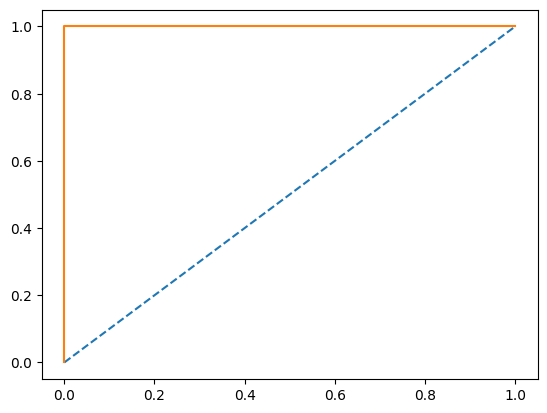

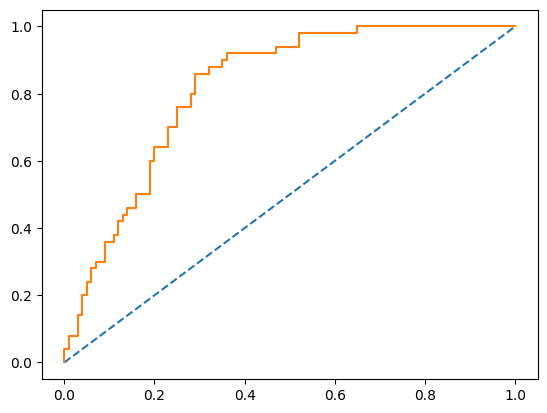

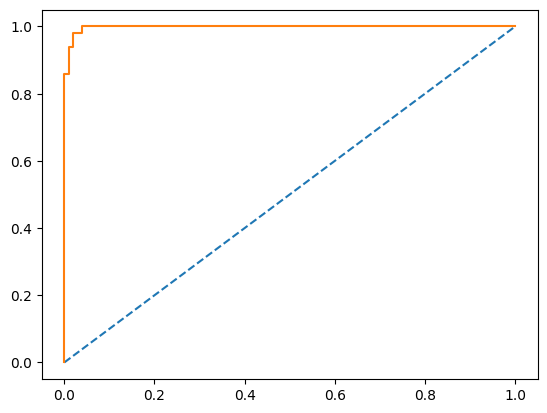

In [14]:
#Plot ROC for each label

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

fpr = dict()
tpr = dict()
auc = dict()

for i in range(0 , len(data.species.unique())):
  #Step2: Calc AUC
  auc[i] = roc_auc_score(y[:,i],y_prob_score[:,i])
  fpr[i],tpr[i],_ = roc_curve(y[:,i],y_prob_score[:,i])

for i in range(0, data.species.nunique()):
  plt.figure()
  #Step3: Plot Skill Line (0,0)(1,1)
  plt.plot([0,1],[0,1],linestyle="--")
  plt.plot(fpr[i],tpr[i])
  print(auc[i])